# Analysis of A549 IF-seq

by Pu Zheng

(The experiment was done by Jun-Han Su)

2021.3.19

Antibody experiment design v.1 < get this to work first, before moving on 
	1. Primary (seq IF antibodies) - (5 hrs) - CD51 (1:100) > CD61 (1:100) > VCAM-1 (1:100) > SMA-1 (1:100) (4)
	2. Combo mixture - (1.5 hrs) - E-cadherin, N-cadherin, Vimentin, KRT18, FN, MMP9 (6)
	Total items stained = 10 (5 rounds)
	
	NDB_422	Cy5	CD51 V
	NDB_423	Cy7	KRT18
	NDB_425	Cy5	CD61 V
	NDB_426	Cy7	VIM
	NDB_428	Cy5	CD106 -1 < NDB428
	NDB_429	Cy7	SMA1 V
	NDB_432	Cy5	E-cad
	NDB_434	Cy7	FN V
	NDB_435	Cy5	N-cad -2 < NDB435
	NDB_437	Cy7	MMP9

	• Sequential:
	• Streptavidin-oligo complex mix
		○ NDB422, 425, 428, 429 (2x) (15+15+15+10 = 55)
			§ 0.7 uL 1 ug/mL streptavidin (14 pmol)
			§ 1.5 uL 10 uM oligo (14 pmol)
			§ Mix in 5 uL PBS
		○ Incubate 15 mins at 37C
	• Add 2 ug of antibody (14 pmol; 4 uL) ~15 uL 
		○ Incubate 15 mins at 37C
		○ Add excess biotin (1:200, + 2uL) -> incubate 10 mins at 37C
		○ Add all the antibody into 380 uL of hybe buffer (add 1:25 tRNA and 1:25 sperm DNA - 10 uL)
	○ Add antibody into 380 uL of hybe buffer (add 1:25 tRNA and 1:25 sperm DNA - 20 uL)
	○ 10-combo: 
		○ 0.35 uL 1 ug/mL streptavidin (7 pmol)
		○ 1.5 uL 10 uM oligo (14 pmol)
		○ Mix in 4 uL PBS -> 15 mins (start from combo biotin)
		○ Add antibody 1 ug (7 pmol, 2 uL) -> 15 mins
		○ Add excess biotin (1:200 + 2 uL ~ 40pmol) -> 10 mins
	○ Sample prep (15+10+10+10+40 = 85)
		○ PFA fix 10 mins
		○ Triton 10 mins
		○ Strept block 10 mins
		○ Biotin block 10 mins
		○ Block 30 mins
	○ Primary IF staining (20+10+15+10+10 = 65 per round x 3)
		○ 1:100 in hybe buffer -> incubate for 20 mins at 37C
		○ Wash with PBS (3 mins each)
		○ Streptavidin mix incubate for 15 mins at 37C
		○ Wash with PBS (3 mins each)
		○ Biotin blocking for 10 mins
		

	1. Equilibrate sample with wash buffer for 15 mins
		○ 2x SSC, 10% EC, 1:1000 Rnase inhibitor
	2. Add 300 nM of smFISH (start with 1:15, or 10 uL in 100 uL hybe buffer - 20 ug)
		○ 2x SSC (10 uL)
		○ 10% EC (10 uL)
		○ yeast tRNA (10 uL)
		○ 10% dextran sulfate (20 uL)
		○ Rnase inhibitor (2 uL)
		○ smFISH probe (1:15, 6.67 uL)
		○ H2O (41.33 uL)
Incubate O/N at 37C

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

62308


In [2]:
data_folder = r'\\10.245.74.158\Chromatin_NAS_6\20180726_EMT_A549_IF-seq'


In [3]:
folders, fovs = get_img_info.get_folders(data_folder)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 6
- Number of field of views: 49


In [14]:
# load image
fov_id = 6
all_channels = ['750', '647', '488']

filenames = [os.path.join(_fd, fovs[fov_id]) for _fd in folders[1:]]
if_ims = []

for _fl in filenames:
    _ims, = io_tools.load.correct_fov_image(
        _fl, ['750','647'],
        single_im_size=[30,800,800],
        all_channels=all_channels,
        num_empty_frames=1,
        calculate_drift=False,
        illumination_corr=False,
        chromatic_corr=False,
        bleed_corr=False,
        )
    if_ims += _ims

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20180726_EMT_A549_IF-seq\H1R1\Conv_zscan_06.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20180726_EMT_A549_IF-seq\H1R1\Conv_zscan_06.dax  in 1.030s
-- removing hot pixels for channels:['750', '647'] in 2.808s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 4.022s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20180726_EMT_A549_IF-seq\H2R2\Conv_zscan_06.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20180726_EMT_A549_IF-seq\H2R2\Conv_zscan_06.dax  in 0.643s
-- removing hot pixels for channels:['750', '647'] in 2.648s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 3.471s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20180726_EMT_A549_IF-seq\H3R3\Conv_zscan_06.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20180726_EMT_A549_IF-seq\H3R3\Conv_zscan_06.dax  in 0.607s
-- removing hot pixels fo

<IPython.core.display.Javascript object>


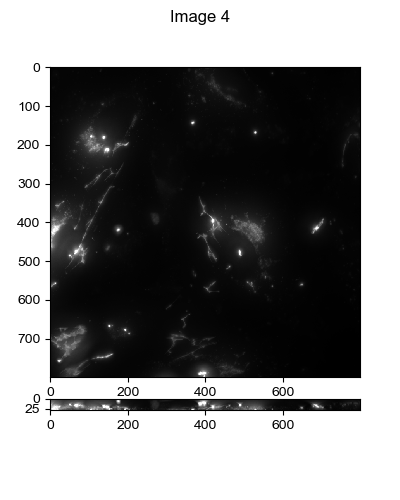

In [15]:
visual_tools.imshow_mark_3d_v2(if_ims)

In [39]:
reload(ia.figure_tools.image)
from ImageAnalysis3.figure_tools.image import visualize_2d_gaussian, visualize_2d_projection
from ImageAnalysis3.figure_tools.color import black_gradient
from ImageAnalysis3.figure_tools import _dpi, _single_col_width,_double_col_width, _font_size, _ticklabel_size, _ticklabel_width

In [129]:
ck5_im = im_dict['750'][:,900:1300,1100:1500]
aire_im = im_dict['635'][:,900:1300,1100:1500]
dapi_im = im_dict['408'][:,900:1300,1100:1500]


In [134]:
figure_folder = os.path.join(data_folder, 'plots')
print(figure_folder)
if not os.path.exists(figure_folder):
    os.makedirs(figure_folder)

\\10.245.74.158\Chromatin_NAS_5\Thymus_mouse\191017_Th_Aire_CK5\plots


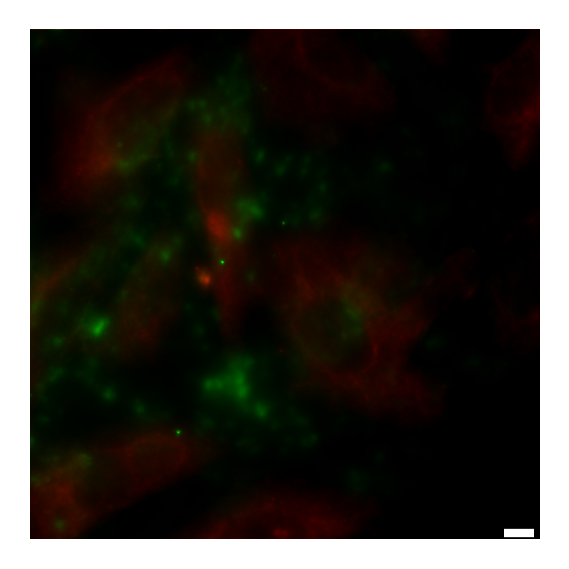

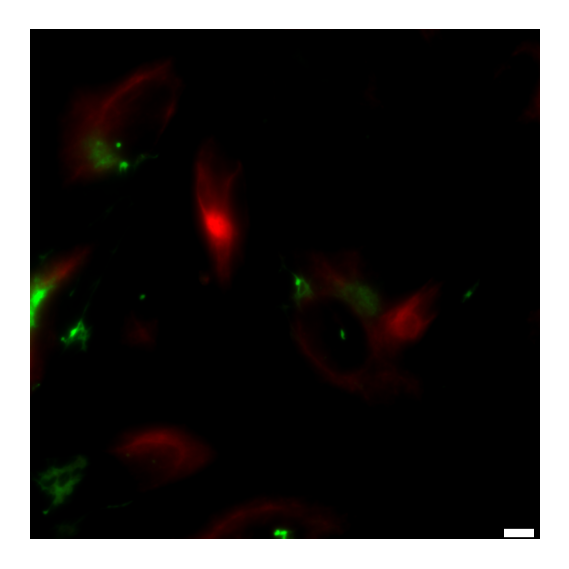

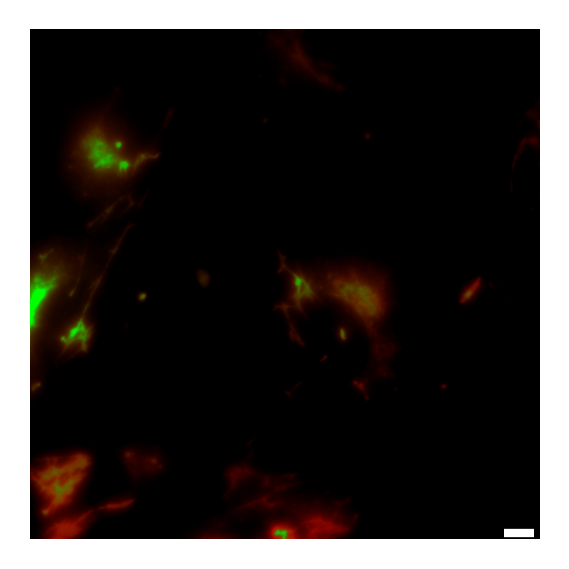

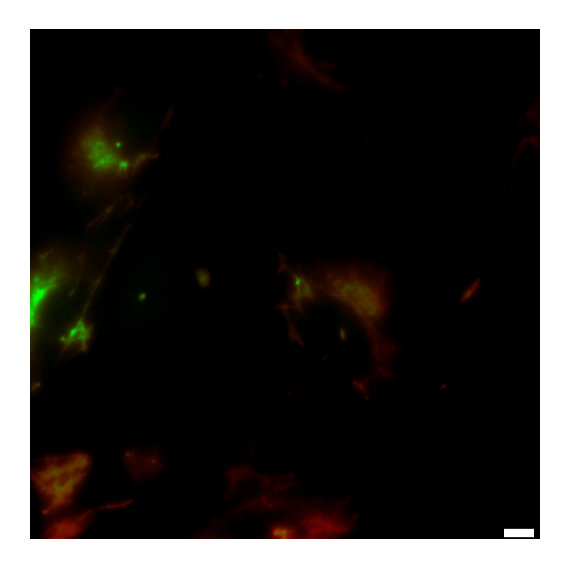

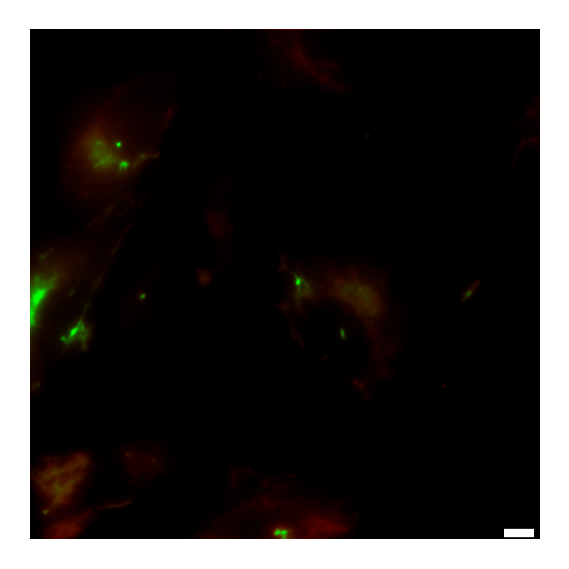

In [40]:
%matplotlib inline
for _i in range(int(len(if_ims)/2)):
    ax = visualize_2d_projection(if_ims[_i*2][1:-1], 
                                 figure_width=_single_col_width, figure_dpi=300,
                                 cmap=black_gradient([1.,0.,0.], transparent=False), 
                                 #color_limits=[150,1500], 
                                 add_reference_bar=False,
                                 reference_bar_color=[1,1,1])
    ax = visualize_2d_projection(if_ims[_i*2+1][1:-1], 
                                 ax=ax,
                                 figure_width=_single_col_width, figure_dpi=300,
                                 cmap=black_gradient([0.,1.,0.], transparent=True), 
                                 #color_limits=[200,8000], 
                                 add_reference_bar=True,
                                 reference_bar_length=5000/ia._distance_zxy[-1],
                                 reference_bar_color=[1,1,1])
    plt.show()
    